# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0812 00:39:34.955814  1264 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0812 00:39:34.994814  1264 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0812 00:39:35.285814  1264 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 00:39:35.296814  1264 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 00:39:35.34181

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0812 00:39:35.505814  1264 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 00:39:35.687814  1264 deprecation.py:323] From C:\Users\Francis\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 247us/step - loss: 2.1539 - acc: 0.1945 - val_loss: 1.9786 - val_acc: 0.2643
Epoch 2/50
50000/50000 [==============================] - 11s 229us/step - loss: 2.0903 - acc: 0.1996 - val_loss: 2.0275 - val_acc: 0.2024
Epoch 3/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.9964 - acc: 0.2357 - val_loss: 1.9635 - val_acc: 0.2492
Epoch 4/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.9376 - acc: 0.2711 - val_loss: 1.9957 - val_acc: 0.2717
Epoch 5/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.8659 - acc: 0.3053 - val_loss: 1.8955 - val_acc: 0.2983
Epoch 6/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.8265 - acc: 0.3228 - val_loss: 1.9619 - val_acc: 0.2828
Epoch 7/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.7966 - acc: 0.3428 - val_loss: 1.

50000/50000 [==============================] - 14s 290us/step - loss: 1.8271 - acc: 0.3482 - val_loss: 1.6547 - val_acc: 0.4135
Epoch 2/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.5975 - acc: 0.4362 - val_loss: 1.7644 - val_acc: 0.3866
Epoch 3/50
50000/50000 [==============================] - 14s 289us/step - loss: 1.5103 - acc: 0.4642 - val_loss: 1.5005 - val_acc: 0.4618
Epoch 4/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.4495 - acc: 0.4867 - val_loss: 1.4599 - val_acc: 0.4848
Epoch 5/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.4052 - acc: 0.4988 - val_loss: 1.4613 - val_acc: 0.4740
Epoch 6/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.3683 - acc: 0.5137 - val_loss: 1.5543 - val_acc: 0.4614
Epoch 7/50
50000/50000 [==============================] - 15s 301us/step - loss: 1.3330 - acc: 0.5273 - val_loss: 1.4271 - val_acc: 0.4940
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 11s 213us/step - loss: 1.8194 - acc: 0.3606 - val_loss: 1.7770 - val_acc: 0.3856
Epoch 3/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.7342 - acc: 0.3931 - val_loss: 1.7004 - val_acc: 0.4079
Epoch 4/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.6728 - acc: 0.4131 - val_loss: 1.6482 - val_acc: 0.4223
Epoch 5/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.6247 - acc: 0.4295 - val_loss: 1.6362 - val_acc: 0.4174
Epoch 6/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.5850 - acc: 0.4431 - val_loss: 1.5796 - val_acc: 0.4413
Epoch 7/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.5490 - acc: 0.4556 - val_loss: 1.5563 - val_acc: 0.4507
Epoch 8/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.5192 - acc: 0.4667 - val_loss: 1.5403 - val_acc: 0.4566
Epoch 9/50
50000/50000 [==============

Epoch 3/50
50000/50000 [==============================] - 8s 161us/step - loss: 2.0250 - acc: 0.2895 - val_loss: 1.9951 - val_acc: 0.3051
Epoch 4/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.9726 - acc: 0.3134 - val_loss: 1.9519 - val_acc: 0.3175
Epoch 5/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.9334 - acc: 0.3282 - val_loss: 1.9171 - val_acc: 0.3335
Epoch 6/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.9032 - acc: 0.3380 - val_loss: 1.8909 - val_acc: 0.3449
Epoch 7/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.8779 - acc: 0.3481 - val_loss: 1.8683 - val_acc: 0.3506
Epoch 8/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.8562 - acc: 0.3558 - val_loss: 1.8484 - val_acc: 0.3568
Epoch 9/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.8377 - acc: 0.3605 - val_loss: 1.8329 - val_acc: 0.3656
Epoch 10/50
50000/50000 [====

Epoch 4/50
50000/50000 [==============================] - 10s 196us/step - loss: 2.2272 - acc: 0.1820 - val_loss: 2.2185 - val_acc: 0.1918
Epoch 5/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.2097 - acc: 0.1937 - val_loss: 2.2023 - val_acc: 0.1977
Epoch 6/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.1942 - acc: 0.2023 - val_loss: 2.1878 - val_acc: 0.2066
Epoch 7/50
50000/50000 [==============================] - 10s 206us/step - loss: 2.1803 - acc: 0.2119 - val_loss: 2.1745 - val_acc: 0.2160
Epoch 8/50
50000/50000 [==============================] - 9s 173us/step - loss: 2.1675 - acc: 0.2192 - val_loss: 2.1623 - val_acc: 0.2232
Epoch 9/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.1555 - acc: 0.2252 - val_loss: 2.1507 - val_acc: 0.2324
Epoch 10/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.1442 - acc: 0.2340 - val_loss: 2.1399 - val_acc: 0.2399
Epoch 11/50
50000/50000 [====

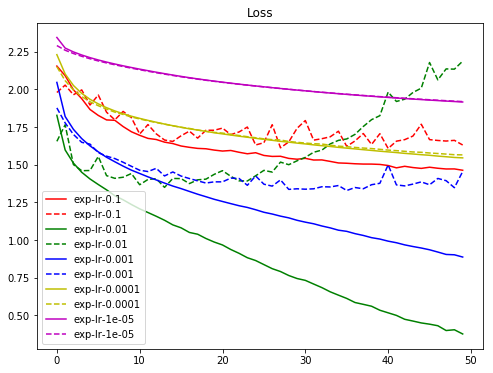

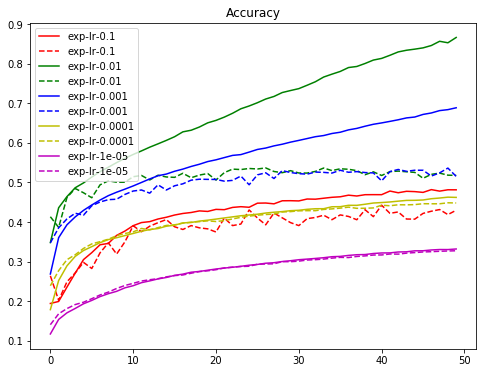

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Use Adam

In [9]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256

In [10]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 224us/step - loss: 14.4268 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 11s 215us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 11s 214us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 11s 218us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 11s 216us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 11s 215us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 11s 214us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 11s 224us/step - loss: 1.9458 - acc: 0.2970 - val_loss: 1.7972 - val_acc: 0.3639
Epoch 2/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.7138 - acc: 0.3866 - val_loss: 1.6897 - val_acc: 0.3989
Epoch 3/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.6281 - acc: 0.4191 - val_loss: 1.6276 - val_acc: 0.4284
Epoch 4/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.5681 - acc: 0.4390 - val_loss: 1.5680 - val_acc: 0.4394
Epoch 5/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.5017 - acc: 0.4637 - val_loss: 1.5343 - val_acc: 0.4543
Epoch 6/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.4709 - acc: 0.4748 - val_loss: 1.5549 - val_acc: 0.4434
Epoch 7/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.4439 - acc: 0.4820 - val_loss: 1.4631 - val_acc: 0.4802
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.7155 - acc: 0.3971 - val_loss: 1.6700 - val_acc: 0.4163
Epoch 3/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.6270 - acc: 0.4287 - val_loss: 1.5915 - val_acc: 0.4411
Epoch 4/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.5737 - acc: 0.4474 - val_loss: 1.5829 - val_acc: 0.4420
Epoch 5/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.5255 - acc: 0.4646 - val_loss: 1.5290 - val_acc: 0.4619
Epoch 6/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.4986 - acc: 0.4742 - val_loss: 1.5256 - val_acc: 0.4569
Epoch 7/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.4586 - acc: 0.4877 - val_loss: 1.5321 - val_acc: 0.4541
Epoch 8/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.4365 - acc: 0.4955 - val_loss: 1.5046 - val_acc: 0.4643
Epoch 9/50
50000/50000 [===

50000/50000 [==============================] - 11s 219us/step - loss: 1.9386 - acc: 0.3251 - val_loss: 1.8885 - val_acc: 0.3472
Epoch 3/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.8578 - acc: 0.3520 - val_loss: 1.8285 - val_acc: 0.3637
Epoch 4/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.8112 - acc: 0.3673 - val_loss: 1.7907 - val_acc: 0.3759
Epoch 5/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.7777 - acc: 0.3807 - val_loss: 1.7652 - val_acc: 0.3837
Epoch 6/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.7500 - acc: 0.3896 - val_loss: 1.7415 - val_acc: 0.3903
Epoch 7/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.7269 - acc: 0.3966 - val_loss: 1.7189 - val_acc: 0.4021
Epoch 8/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.7056 - acc: 0.4054 - val_loss: 1.6996 - val_acc: 0.4095
Epoch 9/50
50000/50000 [==============

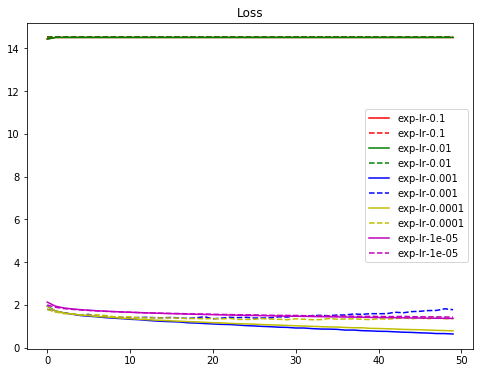

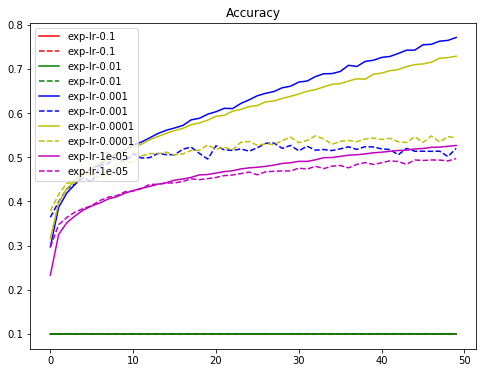

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()